# EDA of Top 250 movies

# GROUP 5s

TEAM MEMBERS:

KAVYASREE KUNA - AP20110010380

M SITA CHANDRA - AP20110010782

DVS CHAITANYA - AP20110010787

SAMPATH KUMAR GOSHIKA - AP20110010718

TONY PREETH - AP20110010369

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [200]:
movies_data = pd.read_csv("C:\\Users\\tpree\\Downloads\\IMDB Top 250 Movies.csv")

In [201]:
movies_data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [202]:
movies_data.sample(3)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
168,169,Warrior,2011,8.2,"Action,Drama,Sport",PG-13,2h 20m,Fight for Country,25000000,23308615,"Tom Hardy,Nick Nolte,Joel Edgerton,Jennifer Mo...",Gavin O'Connor,"Gavin O'Connor,Anthony Tambakis,Cliff Dorfman"
12,13,The Lord of the Rings: The Two Towers,2002,8.8,"Action,Adventure,Drama",PG-13,2h 59m,A New Power Is Rising.,94000000,947944270,"Elijah Wood,Ian McKellen,Viggo Mortensen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
126,127,Batman Begins,2005,8.2,"Action,Crime,Drama",PG-13,2h 20m,The Legend Begins,150000000,373672993,"Christian Bale,Michael Caine,Ken Watanabe,Liam...",Christopher Nolan,"Bob Kane,David S. Goyer,Christopher Nolan"


In [203]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [204]:
movies_data.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [205]:
movies_data.isnull().sum() 

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [206]:
movies_data.shape

(250, 13)

Upon inspecting the dataset, it is evident that there are no null values present in any of the columns.

In [207]:
# Check which columns contain "Not Available" and count them
num_missing_cols = (movies_data == "Not Available").any().sum()

print(f"{num_missing_cols} columns in the dataset contain 'Not Available'.")

4 columns in the dataset contain 'Not Available'.


In [208]:
# Loop over each column and count the number of occurrences of "Not Available"
not_avail_cols = []
for col in movies_data.columns:
    if 'Not Available' in movies_data[col].value_counts().index:
        not_avail_count = movies_data[col].value_counts()['Not Available']
        print(f"Column '{col}' has {not_avail_count} 'Not Available' values.")
        not_avail_cols.append(col)

print(f"\nThere are {len(not_avail_cols)} columns with 'Not Available' values: {not_avail_cols}")

Column 'certificate' has 1 'Not Available' values.
Column 'run_time' has 1 'Not Available' values.
Column 'budget' has 39 'Not Available' values.
Column 'box_office' has 30 'Not Available' values.

There are 4 columns with 'Not Available' values: ['certificate', 'run_time', 'budget', 'box_office']


# EDA (Exploratory Data Analysis)

## Determine the distribution of movie rating

8.1    68
8.2    55
8.3    38
8.4    30
8.5    22
8.6    13
8.8     7
9.0     5
8.0     5
8.7     4
9.3     1
9.2     1
8.9     1
Name: rating, dtype: int64


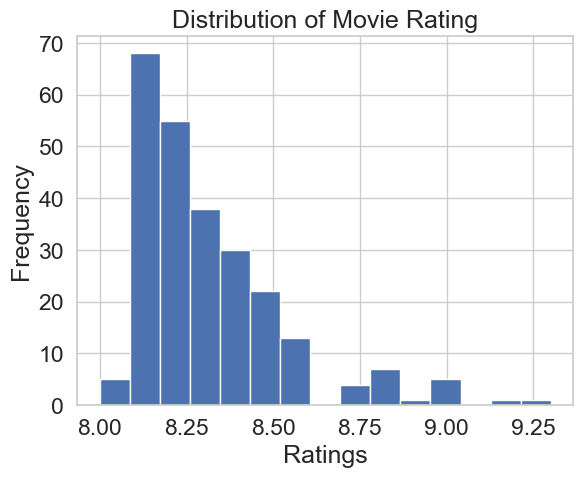

In [209]:
plt.hist(movies_data['rating'],bins=15)
print(movies_data['rating'].value_counts())
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Rating')
plt.show()

we can conclude that the majority of movies in the dataset have a rating between 8.0 and 8.4, with fewer movies having higher ratings above 8.4.

# Distribution of Movie Released Year

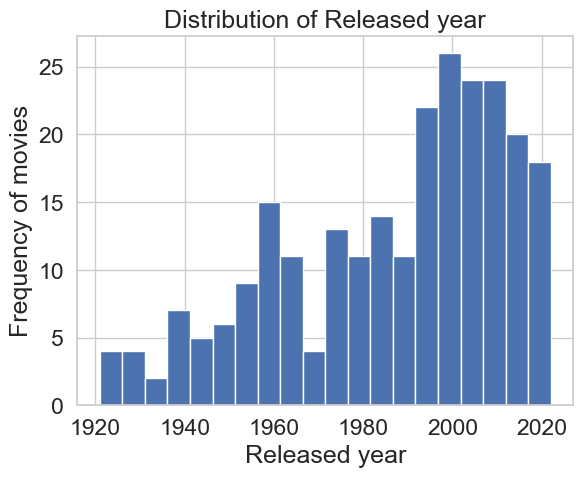

In [210]:
plt.hist(movies_data['year'],bins=20)
plt.xlabel('Released year')
plt.ylabel('Frequency of movies')
plt.title('Distribution of Released year')
plt.show()

# Distribution of top 10 Genres

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Name: genre, dtype: int64


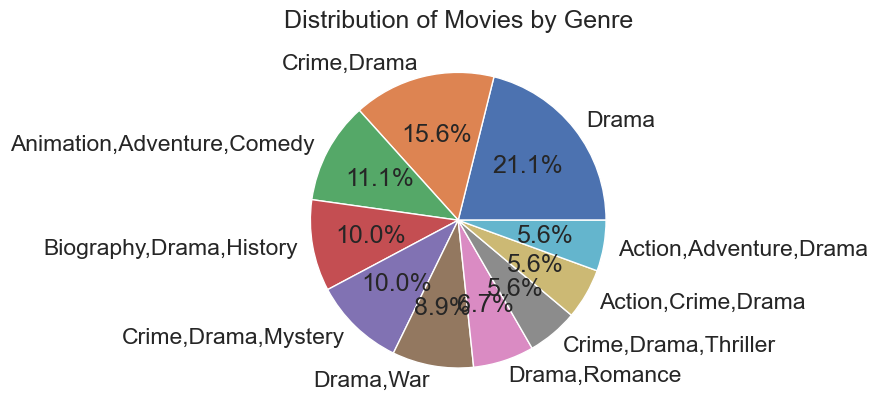

In [211]:
genre_counts = movies_data['genre'].value_counts().head(10)
print(genre_counts)
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movies by Genre')
plt.show()

# Distribution of Movies by Certificate

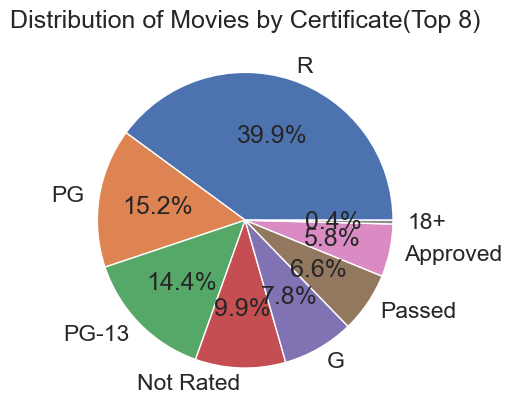

In [212]:
cer_counts = movies_data['certificate'].value_counts().head(8)
plt.pie(cer_counts, labels=cer_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movies by Certificate(Top 8)')
plt.show()

# How does the distribution of movie ratings differ by released year?

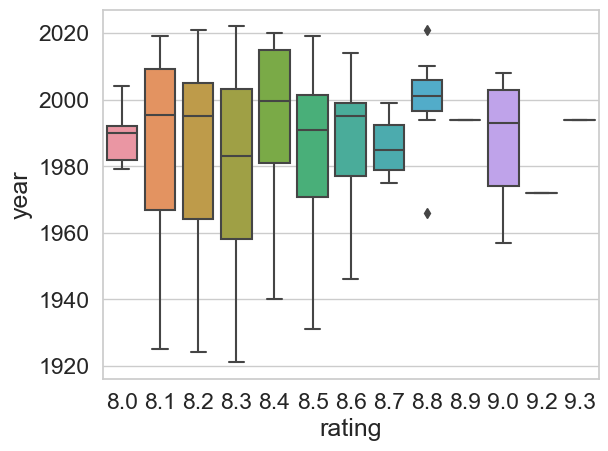

In [213]:
sns.boxplot( x="rating", y='year', data=movies_data, )
plt.show()


# How does the distribution of movie ratings differ by genre?

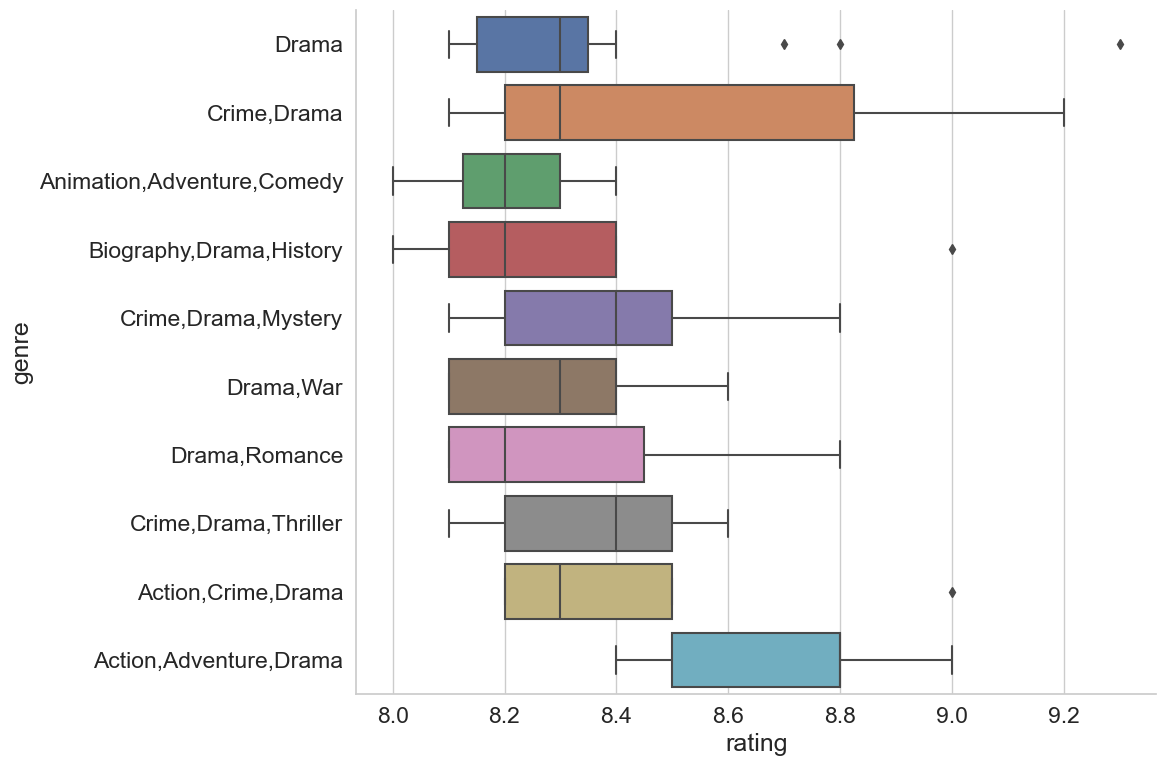

In [214]:
# Get the top 10 genres by movie count
top_genres = movies_data['genre'].str.split('|', expand=True).stack().value_counts().head(10).index

# Filter the dataset to only include movies in the top 10 genres
df_top_genres = movies_data[movies_data['genre'].str.contains('|'.join(top_genres))]

# Create a box plot for each genre
sns.set(style='whitegrid', font_scale=1.5)
sns.catplot(x='rating', y='genre', data=df_top_genres, kind='box', height=8, aspect=1.5, order=top_genres)

# Scatterplot of ratings vs year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


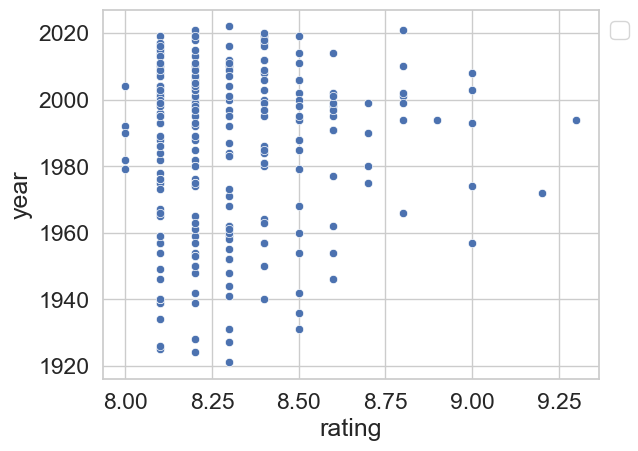

In [215]:
sns.scatterplot( x="rating", y='year', data=movies_data)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

A scatter plot is a diagram where each value in the data set is represented by a dot. hue and size parameters control what visual semantics are used to identify the different subsets. 

## Which directors have the most movies in the dataset?

In [217]:
director_count = movies_data['directors'].value_counts()
display(director_count.head(10))

Martin Scorsese      7
Christopher Nolan    7
Steven Spielberg     7
Stanley Kubrick      7
Akira Kurosawa       7
Alfred Hitchcock     6
Billy Wilder         5
Charles Chaplin      5
Quentin Tarantino    5
Hayao Miyazaki       4
Name: directors, dtype: int64

## Which writers have the most movie credits in the dataset?

In [218]:
writer_list = movies_data['writers'].str.split(", ").explode()

writer_count = writer_list.value_counts()

top_writers = writer_count.head(10)

print('Top writers with the most movie creadits:')
print(top_writers)

Top writers with the most movie creadits:
Charles Chaplin                                 4
J.R.R. Tolkien,Fran Walsh,Philippa Boyens       3
Ingmar Bergman                                  3
Stephen King,Frank Darabont                     2
Christopher Markus,Stephen McFeely,Stan Lee     2
Quentin Tarantino                               2
Akira Kurosawa,Shinobu Hashimoto,Hideo Oguni    2
Guy Ritchie                                     2
Hayao Miyazaki                                  2
Nicholas Pileggi,Martin Scorsese                2
Name: writers, dtype: int64


The writer with the most movie credits in the dataset is Charles Chaplin with four movies. The next most prolific writers are tied with three movie credits each: J.R.R. Tolkien, Fran Walsh, Philippa Boyens, and Ingmar Bergman.

# What is the most common tagline used in movie descriptions?

In [219]:
top_tagline = movies_data['tagline'].value_counts().head(1)
print('The most common tagline used in movie description is:\n', top_tagline)

The most common tagline used in movie description is:
 Fear can hold you prisoner. Hope can set you free.    1
Name: tagline, dtype: int64


## What are the top 10 highest-grossing movies in the dataset?

In [220]:
top_10_grossing = movies_data.sort_values('box_office', ascending=False).head(10)
display(top_10_grossing)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
183,184,Gone Girl,2014,8.1,"Drama,Mystery,Thriller",R,2h 29m,You don't know what you've got 'til it's...,Not Available,Not Available,"Ben Affleck,Rosamund Pike,Neil Patrick Harris,...",David Fincher,Gillian Flynn
234,235,My Father and My Son,2005,8.2,"Drama,Family",Not Rated,1h 52m,"Give him a room dad, he has no place to go...",Not Available,Not Available,"Çetin Tekindor,Fikret Kuskan,Hümeyra,Ege Tanma...",Çagan Irmak,Çagan Irmak
124,125,Dangal,2016,8.3,"Action,Biography,Drama",Not Rated,2h 41m,You think our girls are any lesser than boys?,Not Available,Not Available,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sa...",Nitesh Tiwari,"Piyush Gupta,Shreyas Jain,Nikhil Mehrotra"
195,196,Wild Tales,2014,8.1,"Comedy,Drama,Thriller",R,2h 2m,We can all lose control,Not Available,Not Available,"Darío Grandinetti,María Marull,Mónica Villa,Di...",Damián Szifron,"Germán Servidio,Damián Szifron"
233,234,Jai Bhim,2021,8.8,"Crime,Drama,Mystery",TV-MA,2h 44m,imeDramaMystery,Not Available,Not Available,"Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre"
65,66,Spider-Man: Into the Spider-Verse,2018,8.4,"Animation,Action,Adventure",PG,1h 57m,Enter a universe where more than one wears the...,Not Available,Not Available,"Shameik Moore,Jake Johnson,Hailee Steinfeld,Ma...","Bob Persichetti,Peter Ramsey,Rodney Rothman","Phil Lord,Rodney Rothman"
231,232,Hachi: A Dog's Tale,2009,8.1,"Biography,Drama,Family",G,1h 33m,"A true story of faith, devotion and undying love.",Not Available,Not Available,"Richard Gere,Joan Allen,Cary-Hiroyuki Tagawa,S...",Lasse Hallström,"Stephen P. Lindsey,Kaneto Shindô"
206,207,Tokyo Story,1953,8.2,Drama,Not Rated,2h 16m,"As long as life goes on, relationships between...",Not Available,Not Available,"Chishû Ryû,Chieko Higashiyama,Sô Yamamura,Sets...",Yasujirô Ozu,"Kôgo Noda,Yasujirô Ozu"
86,87,High and Low,1963,8.4,"Crime,Drama,Mystery",Not Rated,2h 23m,142 Screenful Minutes of Thrills and Suspense!,Not Available,Not Available,"Toshirô Mifune,Yutaka Sada,Tatsuya Nakadai,Kyô...",Akira Kurosawa,"Hideo Oguni,Ryûzô Kikushima,Eijirô Hisaita"
228,229,La haine,1995,8.1,"Crime,Drama",Not Rated,1h 38m,"So far, so good",Not Available,Not Available,"Vincent Cassel,Hubert Koundé,Saïd Taghmaoui,Ab...",Mathieu Kassovitz,Mathieu Kassovitz


# Top 10 Highest-Grossing movies

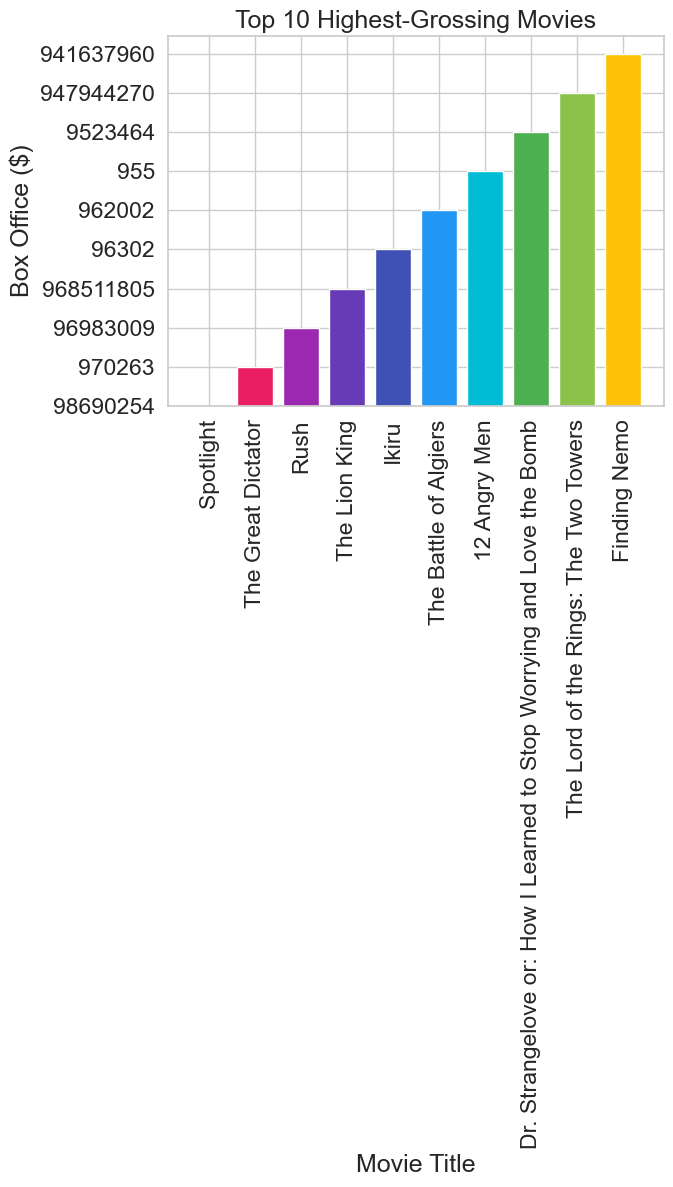

In [221]:
# Filter out the 'Not Available' box office values and sort by descending order
top_grossing = movies_data[movies_data['box_office'] != 'Not Available'].sort_values(by='box_office', ascending=False).head(10)

# Create a list of 10 different colors
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#00BCD4', '#4CAF50', '#8BC34A', '#FFC107']

# Plot the bar chart
plt.bar(x=top_grossing['name'], height=top_grossing['box_office'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Box Office ($)')
plt.title('Top 10 Highest-Grossing Movies')
plt.show()